<a href="https://colab.research.google.com/github/noweahc/energy/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv('/content/drive/MyDrive/23energy/23data/train.csv',encoding = 'utf-8')
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [43]:
train.shape

(204000, 10)

In [44]:
train = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train.drop('num_date_time', axis = 1, inplace=True)

In [45]:
train.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [46]:
test = pd.read_csv('/content/drive/MyDrive/23energy/23data/test.csv',encoding = 'utf-8')
test.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [47]:
test = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test.drop('num_date_time', axis = 1, inplace=True)

In [48]:
test.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity
0,1,20220825 00,23.5,0.0,2.2,72
1,1,20220825 01,23.0,0.0,0.9,72
2,1,20220825 02,22.7,0.0,1.5,75
3,1,20220825 03,22.1,0.0,1.3,78
4,1,20220825 04,21.8,0.0,1.0,77


In [49]:
building = pd.read_csv('/content/drive/MyDrive/23energy/23data/building_info.csv',encoding = 'utf-8')
building.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [50]:
building = building.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

In [51]:
building.head()

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [52]:
print(train.shape)
print(test.shape)

(204000, 9)
(16800, 6)


In [53]:
train = pd.merge(train, building, on='building_number', how='left')
test = pd.merge(test, building, on='building_number', how='left')

In [54]:
print('강수량 null: ', train['rainfall'].isnull().sum())
print('일조 null: ', train['sunshine'].isnull().sum())
print('일사 null: ', train['solar_radiation'].isnull().sum())

강수량 null:  160069
일조 null:  75182
일사 null:  87913


In [55]:
train['building_number'].value_counts()

1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: building_number, Length: 100, dtype: int64

In [56]:
# PCS는 ESS(전력 에너지 저장 장치) 전력 변환 장치라고 함
# https://blog.naver.com/PostView.naver?blogId=dsjang650628&logNo=222234935222 참고
print('태양광발전기없음: ', len(train[train['solar_power_capacity'] == '-']))
print('ESS없음: ',len(train[train['ess_capacity'] == '-']))
print('PCS없음: ',len(train[train['pcs_capacity'] == '-']))

태양광발전기없음:  130560
ESS없음:  193800
PCS없음:  193800


In [57]:
#ess,pcs 둘은 같이 있거나 같이 없거나.
#ess,pcs 가진 건물번호는 5,7,19,21,71번
train[(train['ess_capacity'] != '-') & (train['pcs_capacity'] != '-')]['building_number'].value_counts()

5     2040
7     2040
19    2040
21    2040
71    2040
Name: building_number, dtype: int64

In [58]:
#ess,pcs 가진 건물타입은 건물기타(?), 공공건물, 연구소건물
train[(train['ess_capacity'] != '-') & (train['pcs_capacity'] != '-')]['building_type'].value_counts()

건물기타    4080
공공      4080
연구소     2040
Name: building_type, dtype: int64

In [59]:
#파생변수 1: 체감온도
train['sensory_temp'] = 13.12 + 0.6215 * train['temperature'] - 11.37 * (train['windspeed'] ** 0.16) + 0.3965 * (train['windspeed'] ** 0.16) * train['temperature']
train

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,sensory_temp
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,-,-,-,20.751584
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,-,-,-,20.008954
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,-,-,-,19.476910
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,-,-,-,18.487958
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,-,-,-,19.751534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,-,-,-,25.302757
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,-,-,-,24.446518
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-,23.433400
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-,23.661275


In [60]:
def make_time(train):
    """
    시간 관련 변수를 추가하기 위한 함수
    """
    train['date_time'] = pd.to_datetime(train.date_time)

    train['month'] = train.date_time.dt.month                    # 월(숫자)
    train['day'] = train.date_time.dt.day                        # 일(숫자)
    train['hour'] = train.date_time.dt.hour                      # 시(숫자)
    train['weekday'] = train.date_time.dt.weekday                # 요일(숫자)
    train['dayofyear'] = train.date_time.dt.dayofyear            # 연 기준 몇일째(숫자)

    return train

In [61]:
train = make_time(train)
test = make_time(test)

In [62]:
#현충일,광복절 주말로 처리
train.loc[train.weekday >= 5, 'holiday'] = 1
train.loc[train.weekday < 5, 'holiday'] = 0

test.loc[test.weekday >= 5, 'holiday'] = 1
test.loc[test.weekday < 5, 'holiday'] = 0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

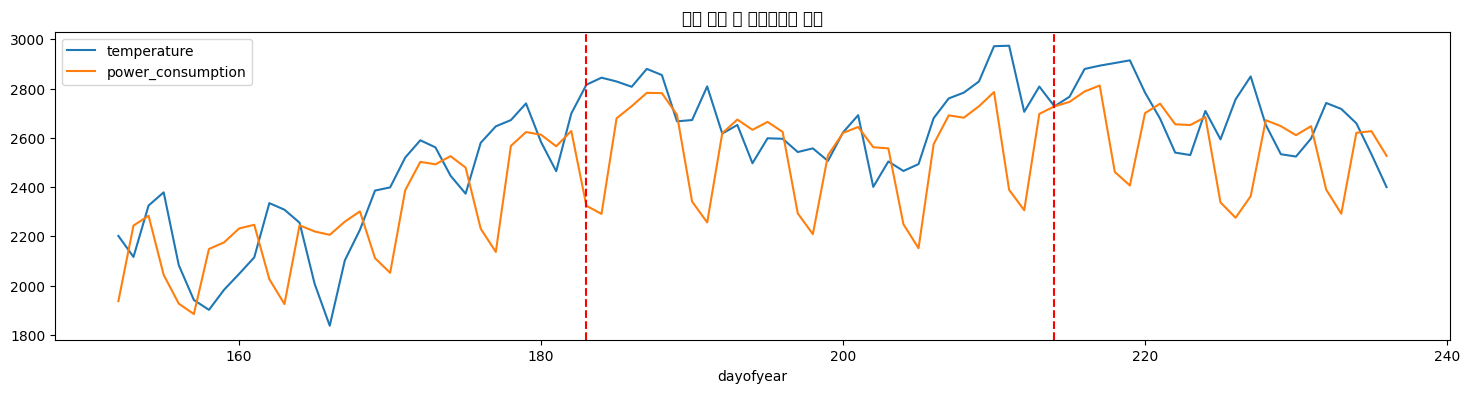

In [68]:
(train.groupby(['dayofyear'])['temperature'].mean()*100).plot(figsize=(18, 4))
train.groupby(['dayofyear'])['power_consumption'].mean().plot(figsize=(18, 4))
plt.legend(['temperature', 'power_consumption'])
plt.axvline(x = 183, color = 'r', linestyle = '--',)
plt.axvline(x = 214, color = 'r', linestyle = '--',)
plt.title('일별 기온 및 전력사용량 추이')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

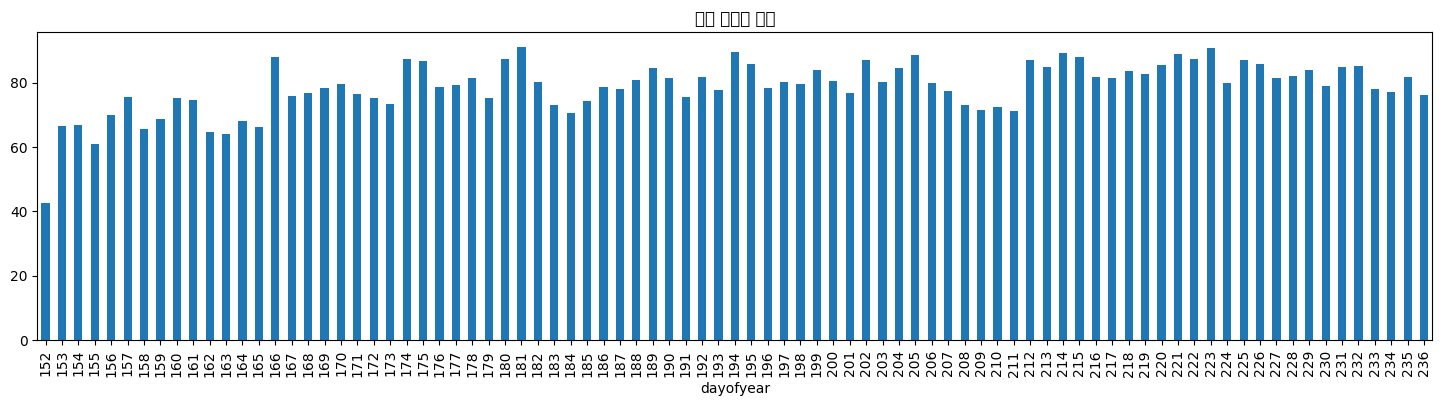

In [70]:
(train.groupby(['dayofyear'])['humidity'].mean()).plot(kind='bar', figsize=(18, 4))
plt.title('일별 습도 추이')
plt.show()

In [63]:
#상관관계 분석을 위함
train_corrdf = train.loc[:,['temperature','windspeed','humidity','power_consumption','total_area','cooling_area','sensory_temp']]
train_corrdf

,temperature,windspeed,humidity,power_consumption,total_area,cooling_area,sensory_temp
0,18.6,0.9,42.0,1085.28,110634.00,39570.00,20.751584
1,18.0,1.1,45.0,1047.36,110634.00,39570.00,20.008954
2,17.7,1.5,45.0,974.88,110634.00,39570.00,19.476910
3,16.7,1.4,48.0,953.76,110634.00,39570.00,18.487958
4,18.4,2.8,43.0,986.40,110634.00,39570.00,19.751534
...,...,...,...,...,...,...,...
203995,23.1,0.9,86.0,881.04,57497.84,40035.23,25.302757
203996,22.4,1.3,86.0,798.96,57497.84,40035.23,24.446518
203997,21.3,1.0,92.0,825.12,57497.84,40035.23,23.433400
203998,21.0,0.3,94.0,640.08,57497.84,40035.23,23.661275


In [28]:
train_corrdf.isnull().sum()

temperature           0
windspeed            19
humidity              9
power_consumption     0
total_area            0
cooling_area          0
sensory_temp         19
dtype: int64

In [29]:
train_corr = train_corrdf.corr()
train_corr

,temperature,windspeed,humidity,power_consumption,total_area,cooling_area,sensory_temp
temperature,1.000000,0.220203,-0.389854,0.171190,-0.003338,-0.003055,0.994074
windspeed,0.220203,1.000000,-0.219095,0.109954,-0.055012,-0.053791,0.170481
humidity,-0.389854,-0.219095,1.000000,-0.129546,-0.020119,-0.020518,-0.375267
power_consumption,0.171190,0.109954,-0.129546,1.000000,0.013463,0.016444,0.162820
total_area,-0.003338,-0.055012,-0.020119,0.013463,1.000000,0.998884,-0.001110
cooling_area,-0.003055,-0.053791,-0.020518,0.016444,0.998884,1.000000,-0.000887
sensory_temp,0.994074,0.170481,-0.375267,0.162820,-0.001110,-0.000887,1.000000


<Axes: >

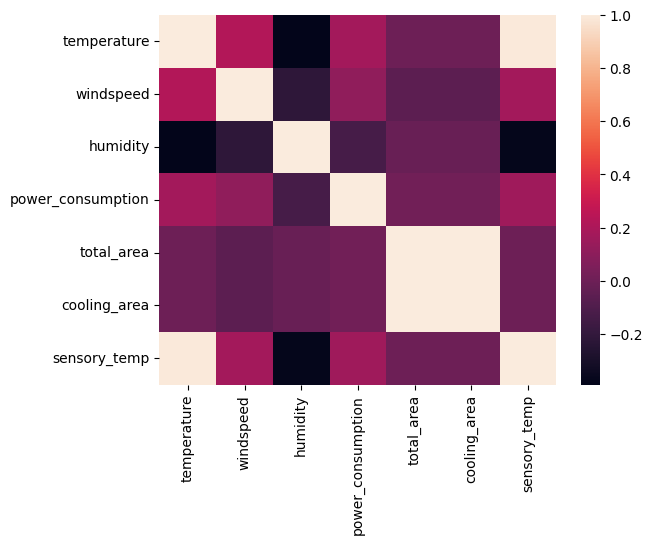

In [30]:
sns.heatmap(train_corrdf.corr())